In [ ]:
%pip install pandas
%pip install numpy

In [ ]:
import pandas as pd
import numpy as np

In [59]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

data  = pd.read_csv(URL)

In [ ]:
data.ConvertedComp.plot(kind = 'density')

In [ ]:
data.ConvertedComp.hist()

In [60]:
print(f"Median of ConvertedComp column = {data.ConvertedComp.median()}")

Median of ConvertedComp column = 57745.0


In [ ]:
data.Gender.value_counts()

In [48]:
print(f"Median of ConvertedComp for Women = {data[data.Gender == 'Woman'].ConvertedComp.median()}")

Median of ConvertedComp for Women = 57708.0


In [47]:
data.Age.describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

<Axes: >

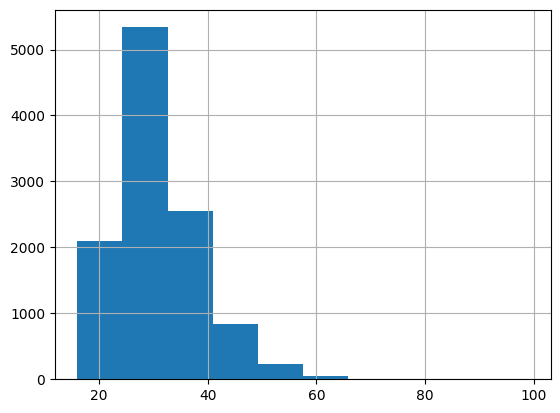

In [49]:
data.Age.hist()

<Axes: >

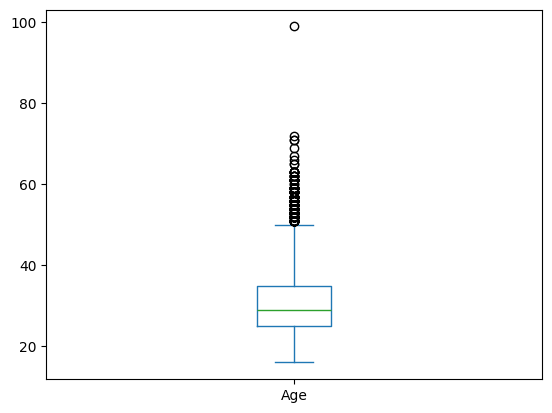

In [ ]:
data.ConvertedComp.plot(kind = 'box')

In [25]:
data.ConvertedComp.describe()

count    1.058200e+04
mean     1.315967e+05
std      2.947865e+05
min      0.000000e+00
25%      2.686800e+04
50%      5.774500e+04
75%      1.000000e+05
max      2.000000e+06
Name: ConvertedComp, dtype: float64

In [61]:
percentile_25 = data.ConvertedComp.quantile(0.25)
percentile_75 = data.ConvertedComp.quantile(0.75)
iqr = percentile_75 - percentile_25
lower_bound = percentile_25 - 1.5 * iqr
upper_bound = percentile_75 + 1.5 * iqr
print(f"IQR         = {iqr}")
print(f"Lower bound = {lower_bound}")
print(f"Upper bound = {upper_bound}")

IQR         = 73132.0
Lower bound = -82830.0
Upper bound = 209698.0


In [40]:
len(data[(data.ConvertedComp < lower_bound) | (data.ConvertedComp > upper_bound)])

879

In [66]:
data_without_convertedcomp_outliers = data[(data.ConvertedComp >= lower_bound) & (data.ConvertedComp <= upper_bound)]

In [ ]:
print(f"Median of ConvertedComp column = {data_without_convertedcomp_outliers.ConvertedComp.median()}")

Median of ConvertedComp column = 59883.20838915799


In [42]:
data.dtypes

Respondent       int64
MainBranch      object
Hobbyist        object
OpenSourcer     object
OpenSource      object
                 ...  
Sexuality       object
Ethnicity       object
Dependents      object
SurveyLength    object
SurveyEase      object
Length: 85, dtype: object

In [46]:
data.select_dtypes(include=np.number).corr().Age

Respondent       0.004041
CompTotal        0.006970
ConvertedComp    0.105386
WorkWeekHrs      0.036518
CodeRevHrs      -0.020469
Age              1.000000
Name: Age, dtype: float64